# Generate model predictions and (optionally) write to file for evaluation

In [8]:
from keras.models import model_from_json
import numpy as np

model = "regressionJun24Positives"
modelName = "record_4_model_LmISa"

model_json = "../model_files/%s/%s_modelJson.json" % (model, modelName)
model_weights = "../model_files/%s/%s_modelWeights.h5" % (model, modelName)

keras_model = model_from_json(open(model_json).read())
keras_model.load_weights(model_weights)

In [9]:
import h5py
import os

# trainHdf5 = h5py.File('../hdf5files/' + model + '/train_data.hdf5')
validHdf5 = h5py.File('../hdf5files/' + model + '/valid_data.hdf5')
testHdf5 = h5py.File('../hdf5files/' + model + '/test_data.hdf5')

# X_train = trainHdf5['X/sequence']
X_val = validHdf5['X/sequence']
X_test = testHdf5['X/sequence']

# y_train_pred = keras_model.predict(X_train, batch_size = 500, verbose = 1)
y_val_pred = keras_model.predict(X_val, batch_size = 500, verbose = 1)
y_test_pred = keras_model.predict(X_test, batch_size = 500, verbose = 1)

os.system("mkdir ../predictions/%s/" % model)

# np.savetxt('../predictions/%s/trainPredictions.txt' % model, y_train_pred, delimiter='\t')
np.savetxt('../predictions/%s/validPredictions.txt' % model, y_val_pred, delimiter='\t')
np.savetxt('../predictions/%s/testPredictions.txt' % model, y_test_pred, delimiter='\t')

102992/102992 [==============================] - 69s    


# Load model's train/val/test preds and labels

In [124]:
model = "regressionJun24Positives"

# trainPredictions = open('../predictions/' + model + '/trainPredictions.txt')
validPredictions = open('../predictions/' + model + '/validPredictions.txt')
testPredictions = open('../predictions/' + model + '/testPredictions.txt')

# trainPreds = {'avg': [], 'rep1': [], 'rep2': []}
validPreds = {'avg': [], 'rep1': [], 'rep2': []}
testPreds = {'avg': [], 'rep1': [], 'rep2': []}

# for line in trainPredictions:
#     line = line.strip().split('\t')
#     trainPreds['avg'].append(float(line[0]))
#     trainPreds['rep1'].append(float(line[1]))
#     trainPreds['rep2'].append(float(line[2]))
    
for line in validPredictions:
    line = line.strip().split('\t')
    validPreds['avg'].append(float(line[0]))
    validPreds['rep1'].append(float(line[1]))
    validPreds['rep2'].append(float(line[2]))
    
for line in testPredictions:
    line = line.strip().split('\t')
    testPreds['avg'].append(float(line[0]))
    testPreds['rep1'].append(float(line[1]))
    testPreds['rep2'].append(float(line[2]))

In [125]:
import h5py

model = "regressionJun24Positives"
trainHdf5 = h5py.File('../hdf5files/' + model + '/train_data.hdf5')
# validHdf5 = h5py.File('../hdf5files/' + model + '/valid_data.hdf5')
# testHdf5 = h5py.File('../hdf5files/' + model + '/test_data.hdf5')

trainLabels = {'avg': [], 'rep1': [], 'rep2': []}
validLabels = {'avg': [], 'rep1': [], 'rep2': []}
testLabels = {'avg': [], 'rep1': [], 'rep2': []}

for label in trainHdf5['Y']['output']:
    trainLabels['avg'].append(label[0])
    trainLabels['rep1'].append(label[1])
    trainLabels['rep2'].append(label[2])
    
for label in validHdf5['Y']['output']:
    validLabels['avg'].append(label[0])
    validLabels['rep1'].append(label[1])
    validLabels['rep2'].append(label[2])

for label in testHdf5['Y']['output']:
    testLabels['avg'].append(label[0])
    testLabels['rep1'].append(label[1])
    testLabels['rep2'].append(label[2])

In [127]:
import numpy as np
# for predDict in [trainPreds, validPreds, testPreds, trainLabels, validLabels, testLabels]:
for predDict in [validPreds, testPreds, trainLabels, validLabels, testLabels]:
    predDict['avg'] = np.array(predDict['avg'])
    predDict['rep1'] = np.array(predDict['rep1'])
    predDict['rep2'] = np.array(predDict['rep2'])

In [128]:
from scipy.stats import pearsonr, spearmanr
print "Avg signal predictions Pearson = " + str(pearsonr(validPreds['avg'], validLabels['avg']))
print "Avg signal predictions Spearman = " + str(spearmanr(validPreds['avg'], validLabels['avg']))
print "Rep1 signal predictions Pearson = " + str(pearsonr(validPreds['rep1'], validLabels['rep1']))
print "Rep1 signal predictions Spearman = " + str(spearmanr(validPreds['rep1'], validLabels['rep1']))
print "Rep2 signal predictions Pearson = " + str(pearsonr(validPreds['rep2'], validLabels['rep2']))
print "Rep2 signal predictions Spearman = " + str(spearmanr(validPreds['rep2'], validLabels['rep2']))

Avg signal predictions Pearson = (0.38887235824512417, 0.0)
Avg signal predictions Spearman = SpearmanrResult(correlation=0.24449619496020322, pvalue=0.0)
Rep1 signal predictions Pearson = (0.22787797714790445, 0.0)
Rep1 signal predictions Spearman = SpearmanrResult(correlation=0.12867201040708454, pvalue=3.2667608752716399e-190)
Rep2 signal predictions Pearson = (0.40564272850016203, 0.0)
Rep2 signal predictions Spearman = SpearmanrResult(correlation=0.28968217845251903, pvalue=0.0)


# Plot labels vs. predictions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.subplot(111);
plt.figure();
plt.title('Average Replicate Signal, Training Set');
g = sns.regplot(trainLabels['avg'], trainPreds['avg']);
g.set(xlabel='y_true', ylabel='y_pred');
plt.show()
# g.set_xlim(0, 250);

# plt.subplot(122);
plt.figure();
plt.title('Replicate 1 Signal, Training Set');
g = sns.regplot(trainLabels['rep1'], trainPreds['rep1']);
g.set(xlabel='y_true', ylabel='y_pred');
plt.show()
# g.set_xlim(0, 250);

# plt.subplot(133);
plt.figure();
plt.title('Replicate 2 Signal, Training Set');
g = sns.regplot(trainLabels['rep2'], trainPreds['rep2']);
g.set(xlabel='y_true', ylabel='y_pred');
plt.show()
# g.set_xlim(0, 250);

# plt.subplot(214);
# plt.title('Average Replicate Signal, Validation Set');
# g = sns.regplot(validLabels['avg'], validPreds['avg']);
# g.set(xlabel='y_true', ylabel='y_pred');
# g.set_xlim(0, 250);


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.subplot(111);
plt.figure();
plt.title('Average Replicate Signal, Validation Set');
g = sns.regplot(validLabels['avg'], validPreds['avg']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(122);
plt.figure();
plt.title('Replicate 1 Signal, Validation Set');
g = sns.regplot(validLabels['rep1'], validPreds['rep1']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(133);
plt.figure();
plt.title('Replicate 2 Signal, Validation Set');
g = sns.regplot(validLabels['rep2'], validPreds['rep2']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.subplot(111);
plt.figure();
plt.title('Average Replicate Signal, Test Set');
g = sns.regplot(testLabels['avg'], testPreds['avg']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(122);
plt.figure();
plt.title('Replicate 1 Signal, Test Set');
g = sns.regplot(testLabels['rep1'], testPreds['rep1']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

# plt.subplot(133);
plt.figure();
plt.title('Replicate 2 Signal, Test Set');
g = sns.regplot(testLabels['rep2'], testPreds['rep2']);
g.set(xlabel='y_true', ylabel='y_pred');
sns.plt.show()
# g.set_xlim(0, 250);

7/26: Above stuff is old, going to make some jointplots now. One each for rep1 vs. rep2, rep2 vs. preds, and rep2 vs. preds at CAGE TSS regions.

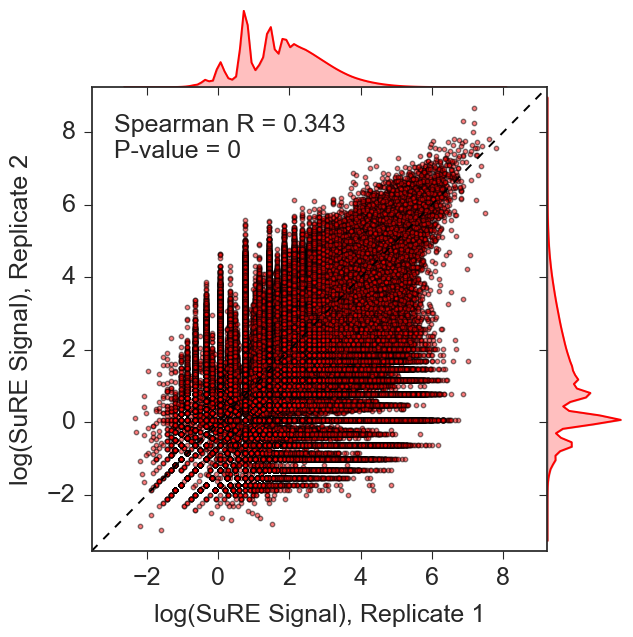

In [174]:
import matplotlib
reload(matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import plot_functions
reload(plot_functions)
from plot_functions import jointplot

# plt.figure(figsize=(12,12), dpi=300)

rc = {'axes.labelsize': 30, 
      'legend.fontsize': 12, 
      'axes.titlesize': 7.5, 
      'xtick.labelsize': 36, 
      'ytick.labelsize': 36,
      'font.sans-serif': 'Arial',
      'font.family': 'sans-serif'
     }

# sns.set(context='paper', 
#         style='dark', 
#         font='Arial', 
#         font_scale=1, 
#         color_codes=False, 
#         rc=rc
#        )

rep1 = trainLabels['rep1']
rep2 = trainLabels['rep2']

jointplot(vals1 = np.log(rep1), vals2 = np.log(rep2),
          out_pdf = "../plots/sure_scatterplots/rep1rep2Jointplot_train.png",
          show = True,
          cor = 'spearmanr',
          square = True,
          despine = False,
          x_label = "log(SuRE Signal), Replicate 1",
          y_label = "log(SuRE Signal), Replicate 2",
          figsize = 6,
          ratio = 6,
          dpi = 300,
          color = 'red',
          kde = True,
          bw = 0.1)

avg = testLabels['avg']
rep1 = testLabels['rep1']
rep2 = testLabels['rep2']

preds_avg = testPreds['avg']
preds_rep1 = testPreds['rep1']
preds_rep2 = testPreds['rep2']

# jointplot(vals1 = np.log(rep2), vals2 = np.log(preds_rep2),
#           out_pdf = "../plots/sure_scatterplots/rep2TrueRep2PredsJointplot_test.png",
#           show = True,
#           cor = 'spearmanr',
#           square = True,
#           despine = False,
#           x_label = "log(Average SuRE Signal), Experimental",
#           y_label = "log(Average SuRE Signal), Predicted",
#           figsize = 6,
#           ratio = 6,
#           dpi = 300,
#           color = 'red',
#           kde = True)

# plt.suptitle("SuRE Scores, Replicate 1 vs. Replicate 2")
# # plt.tight_layout()
# plt.show()

# Evaluate performance at TSS regions

In [1]:
import numpy as np
import seaborn as sns

In [2]:
import gzip

gencodeFilePath = "../../data/GENCODE/gencodeTSS/TSS_human_strict_with_gencodetss_notlow_ext50eachside_merged_withgenctsscoord_andgnlist.gff.gz"
tssFile = gzip.open(gencodeFilePath)

gencCageTss = []
for line in tssFile:
    line = line.strip().split('\t')
    annot = line[8].strip().split(' ')
    if annot[1] == "GencCAGE" or annot[1] == "GencOnly" or annot[1] == "CAGEOnly":
        gencCageTss.append(line)

print len(gencCageTss)

247680


In [3]:
chr8Tss = []
for tss in gencCageTss:
    if tss[0] == 'chr8':
        chr8Tss.append(tss)

In [4]:
print len(chr8Tss)
for i in range(len(chr8Tss)):
    chr8Tss[i][3] = int(chr8Tss[i][3])
    chr8Tss[i][4] = int(chr8Tss[i][4])

print chr8Tss[:10]

9919
[['chr8', 'rikcrg', 'tss', 14270, 14370, '.', '-', '.', 'class: GencOnly list_genctssclus: chr8_14270_14370_-, list_genctssclus: ENSG00000253620.2,'], ['chr8', 'rikcrg', 'tss', 22551, 22667, '.', '+', '.', 'class: GencOnly list_genctssclus: chr8_22551_22651_+,chr8_22567_22667_+, list_genctssclus: ENSG00000253896.3,'], ['chr8', 'rikcrg', 'tss', 100678, 100778, '.', '-', '.', 'class: GencOnly list_genctssclus: chr8_100678_100778_-, list_genctssclus: ENSG00000254193.1,'], ['chr8', 'rikcrg', 'tss', 105224, 105324, '.', '+', '.', 'class: GencOnly list_genctssclus: chr8_105224_105324_+, list_genctssclus: ENSG00000253612.1,'], ['chr8', 'rikcrg', 'tss', 116993, 117093, '.', '-', '.', 'class: GencOnly list_genctssclus: chr8_116993_117093_-, list_genctssclus: ENSG00000176269.3,'], ['chr8', 'rikcrg', 'tss', 150512, 150613, '.', '-', '.', 'class: GencOnly list_genctssclus: chr8_150512_150612_-,chr8_150513_150613_-, list_genctssclus: ENSG00000250210.3,ENSG00000255464.1,'], ['chr8', 'rikcrg', '

In [5]:
import gzip

testRegionsFile = gzip.open('../splits/regressionJun24Positives/testJun24RegressionPositives.txt.gz')
testRegions = []
i = 0
for line in testRegionsFile:
    line = line.strip()
    chrom, coords = line.split(':')
    if coords.rfind('-') == coords.find('-'):
        start, end = coords.split('-')
        strand = end.split('(')[1][0]
        end = end[:end.find('(')]
    else:
        start, end = coords.split('-')[:2]
        end = end[:-1]
        strand = line.split('(')[1][0]
    testRegions.append([chrom, int(start), int(end), strand])
    if i < 5:
        print chrom, start, end, strand
    i += 1
    

chr8 19275 20358 +
chr8 25462 26395 +
chr8 28827 29718 +
chr8 29095 30084 -
chr8 29302 29804 +


In [6]:
print len(testRegions)
print testRegions[:4]

102992
[['chr8', 19275, 20358, '+'], ['chr8', 25462, 26395, '+'], ['chr8', 28827, 29718, '+'], ['chr8', 29095, 30084, '-']]


In [ ]:
minDistance = 1000

tssProximalRegionIndices = []
i = 0
for i in range(len(testRegions)):
    if i % 5e3 == 0:
        print i
    fragment = testRegions[i]
    fragmentStart = fragment[1]
    fragmentEnd = fragment[2]
    for j in range(len(chr8Tss)):
        tss = chr8Tss[j]
        tssStart = tss[3]
        tssEnd = tss[4]
        
        # compare chromosomes; if TSS is past it, break, else keep looking
        if int(tss[0].split('chr')[1]) > int(fragment[0].split('chr')[1]):
            break
        elif int(tss[0].split('chr')[1]) < int(fragment[0].split('chr')[1]):
            continue
        
        # compare genomic coordinates
        if tssStart > fragmentEnd + minDistance:
            break
        elif tssEnd + minDistance < fragmentStart:
            continue
        else:
            tssProximalRegionIndices.append((i, j))
            break
    
    i += 1
    

In [ ]:
f = open('../data/evaluation/regressionJun24_testFragmentsNearGencOrCageTss.txt', 'w')
f.write("testFragmentIndex\tTssIndex\n")
for pair in tssProximalRegionIndices:
    f.write(str(pair[0]) + '\t' + str(pair[1]) + '\n')
f.close()

In [132]:
tssProximalRegionIndices = []
f = open('../data/evaluation/regressionJun24_testFragmentsNearGencOrCageTss.txt')
f.readline()
for pair in f:
    pair = pair.strip().split('\t')
    tssProximalRegionIndices.append((int(pair[0]), int(pair[1])))
f.close()

In [133]:
print len(tssProximalRegionIndices)

16166


In [134]:
tssProximalRegions = np.array([i for (i,j) in tssProximalRegionIndices])

In [137]:
from scipy.stats import spearmanr, pearsonr

# Data quality near TSSs
print spearmanr(testLabels['rep1'], testLabels['rep2'])
print spearmanr(testLabels['rep1'][tssProximalRegions], testLabels['rep2'][tssProximalRegions])
# Pearson correlation as they report in their paper... sneaky
print pearsonr(testLabels['rep1'], testLabels['rep2'])
print pearsonr(testLabels['rep1'][tssProximalRegions], testLabels['rep2'][tssProximalRegions])

# Prediction scores near TSSs
print spearmanr(testPreds['avg'], testLabels['avg'])
print spearmanr(testPreds['avg'][tssProximalRegions], testLabels['avg'][tssProximalRegions])
print spearmanr(testPreds['rep1'], testLabels['rep1'])
print spearmanr(testPreds['rep1'][tssProximalRegions], testLabels['rep1'][tssProximalRegions])
print spearmanr(testPreds['rep2'], testLabels['rep2'])
print spearmanr(testPreds['rep2'][tssProximalRegions], testLabels['rep2'][tssProximalRegions])

# Prediction Pearson correlations near TSSs
print pearsonr(testPreds['avg'], testLabels['avg'])
print pearsonr(testPreds['avg'][tssProximalRegions], testLabels['avg'][tssProximalRegions])
print pearsonr(testPreds['rep1'], testLabels['rep1'])
print pearsonr(testPreds['rep1'][tssProximalRegions], testLabels['rep1'][tssProximalRegions])
print pearsonr(testPreds['rep2'], testLabels['rep2'])
print pearsonr(testPreds['rep2'][tssProximalRegions], testLabels['rep2'][tssProximalRegions])

SpearmanrResult(correlation=0.3185754674878522, pvalue=0.0)
SpearmanrResult(correlation=0.48875877010950841, pvalue=0.0)
(0.59774548, 0.0)
(0.71509904, 0.0)
SpearmanrResult(correlation=0.27925849015810761, pvalue=0.0)
SpearmanrResult(correlation=0.48695988629265335, pvalue=0.0)
SpearmanrResult(correlation=0.14544425241919001, pvalue=0.0)
SpearmanrResult(correlation=0.27798288974010926, pvalue=1.1735426309947266e-284)
SpearmanrResult(correlation=0.32585603438931332, pvalue=0.0)
SpearmanrResult(correlation=0.53700083772111429, pvalue=0.0)
(0.39277377565701183, 0.0)
(0.34875063445183213, 0.0)
(0.24213652416284204, 0.0)
(0.23020736036292974, 2.0536862746901267e-193)
(0.40571772037580267, 0.0)
(0.36458709617281371, 0.0)


Scatter plots of replicate-replicate performance and prediction performance at TSS regions.

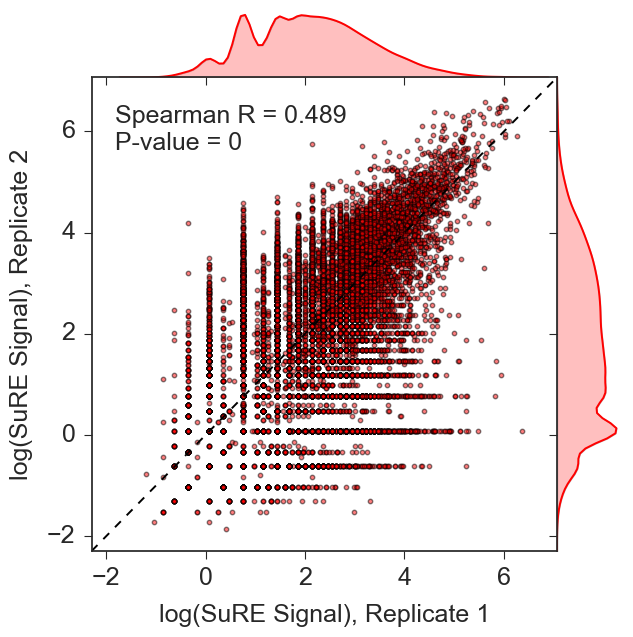

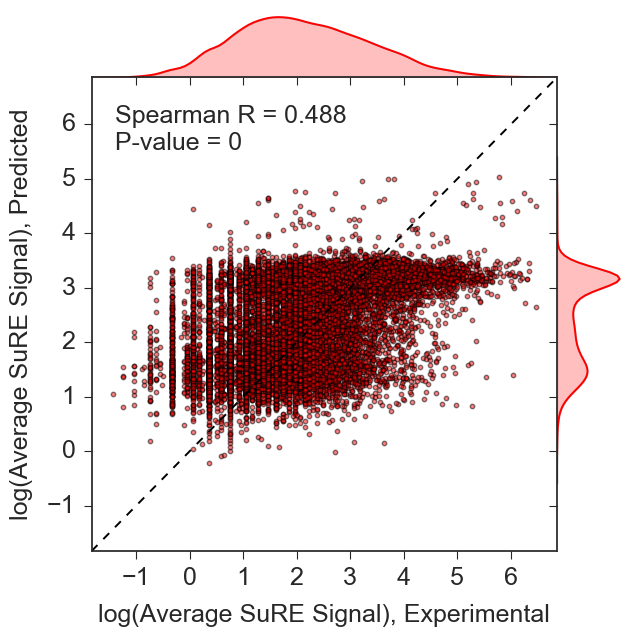

In [170]:
import matplotlib
reload(matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import plot_functions
reload(plot_functions)
from plot_functions import jointplot

avgTss = testLabels['avg'][tssProximalRegions]
rep1Tss = testLabels['rep1'][tssProximalRegions]
rep2Tss = testLabels['rep2'][tssProximalRegions]

jointplot(vals1 = np.log(rep1Tss), vals2 = np.log(rep2Tss),
          out_pdf = "../plots/sure_scatterplots/rep1rep2Jointplot_test_tssProximalFragments.png",
          show = True,
          cor = 'spearmanr',
          square = True,
          despine = False,
          x_label = "log(SuRE Signal), Replicate 1",
          y_label = "log(SuRE Signal), Replicate 2",
          figsize = 6,
          ratio = 7,
          dpi = 300,
          color = 'red',
          kde = True)

preds_avgTss = testPreds['avg'][tssProximalRegions]
preds_rep1Tss = testPreds['rep1'][tssProximalRegions]
preds_rep2Tss = testPreds['rep2'][tssProximalRegions]

jointplot(vals1 = np.log(avgTss), vals2 = np.log(preds_rep2Tss),
          out_pdf = "../plots/sure_scatterplots/avgVsPredsRep2Jointplot_test_tssProximalFragments.png",
          show = True,
          cor = 'spearmanr',
          square = True,
          despine = False,
          x_label = "log(Average SuRE Signal), Experimental",
          y_label = "log(Average SuRE Signal), Predicted",
          figsize = 6,
          ratio = 7,
          dpi = 300,
          color = 'red',
          kde = True)

# Can we reproduce reported correlations of SuRE signal and TSS strength?

In [1]:
import gzip

testRegionsFile = gzip.open('../splits/regressionJun24Positives/testJun24RegressionPositives.txt.gz')
testRegions = []
i = 0
for line in testRegionsFile:
    line = line.strip()
    chrom, coords = line.split(':')
    if coords.rfind('-') == coords.find('-'):
        start, end = coords.split('-')
        strand = end.split('(')[1][0]
        end = end[:end.find('(')]
    else:
        start, end = coords.split('-')[:2]
        end = end[:-1]
        strand = line.split('(')[1][0]
    testRegions.append([chrom, int(start), int(end), strand])
    if i < 5:
        print chrom, start, end, strand
    i += 1

chr8 19275 20358 +
chr8 25462 26395 +
chr8 28827 29718 +
chr8 29095 30084 -
chr8 29302 29804 +


In [2]:
import gzip

# gencodeFilePath = "../../data/GENCODE/gencodeTSS/RAMPAGE_TSS_ENCFF069ZON_hg19converted_idrPeaks.bed"
# tssFile = open(gencodeFilePath)

# rampageTss = []
# for line in tssFile:
#     line = line.strip().split('\t')
#     rampageTss.append(line)

# chr8RampageTss = []
# for tss in rampageTss:
#     if tss[0] == 'chr8':
#         chr8RampageTss.append(tss)

gencodeFilePath = "../../data/GENCODE/gencodeTSS/fantom5.cage.strict.hg19.bed.gz"
tssFile = gzip.open(gencodeFilePath)

rampageTss = []
for line in tssFile:
    line = line.strip().split(' ')
    rampageTss.append(line)

chr8RampageTss = []
for tss in rampageTss:
    if tss[0] == 'chr8':
        chr8RampageTss.append(tss)

In [3]:
print len(rampageTss)
print len(chr8RampageTss)

217572
8789


In [9]:
import numpy as np
chr8RampageTss = np.array(chr8RampageTss)
print chr8RampageTss

[['chr8' '156309' '156331' 'CAGETSS_193232' '0.2847']
 ['chr8' '182368' '182402' 'CAGETSS_193233' '0.4110']
 ['chr8' '182424' '182462' 'CAGETSS_193234' '0.4261']
 ..., 
 ['chr8' '146277816' '146277832' 'CAGETSS_202018' '0.5377']
 ['chr8' '146277833' '146277878' 'CAGETSS_202019' '0.4798']
 ['chr8' '146278716' '146278731' 'CAGETSS_202020' '0.3018']]


In [5]:
maxDistance = 2000 # 2kb, as in the paper
sureRampagePairs = []
i = 0
for (i, fragment) in enumerate(testRegions):
    if i % 5e3 == 0:
        print i
    fragmentStart = fragment[1]
    fragmentEnd = fragment[2]
    for (j, tss) in enumerate(chr8RampageTss):
        tssStart = int(tss[1])
        tssEnd = int(tss[2])
#         print tssStart
#         print tssEnd
#         break
        
        # compare chromosomes; if TSS is past it, break, else keep looking
        if int(tss[0].split('chr')[1]) > int(fragment[0].split('chr')[1]):
            break
        elif int(tss[0].split('chr')[1]) < int(fragment[0].split('chr')[1]):
            continue
        
        # compare genomic coordinates
        if tssStart > fragmentEnd + maxDistance:
            break
        elif tssEnd + maxDistance < fragmentStart:
            continue
        else:
            sureRampagePairs.append((i, j))
            break
    
    i += 1
    
print len(sureRampagePairs)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
10909


In [6]:
import h5py

model = "regressionJun24Positives"
testHdf5 = h5py.File('../hdf5files/' + model + '/test_data.hdf5')
testLabels = {'avg': [], 'rep1': [], 'rep2': []}

for label in testHdf5['Y']['output']:
    testLabels['avg'].append(label[0])
    testLabels['rep1'].append(label[1])
    testLabels['rep2'].append(label[2])

In [10]:
sureIndices = np.array([i for (i,j) in sureRampagePairs])
rampageIndices = np.array([j for (i,j) in sureRampagePairs])
sureSignals = np.array([testLabels['rep2'][idx] for idx in sureIndices])
# avgRampageSignals = (chr8RampageTss[:, 10].astype(np.float) + chr8RampageTss[:, 13].astype(np.float))/2
cageSignals = chr8RampageTss[:, 4].astype(np.float)
rampageSignals = np.array([cageSignals[idx] for idx in rampageIndices]) 

In [12]:
from scipy.stats import spearmanr, pearsonr

print spearmanr(sureSignals, rampageSignals)
print pearsonr(sureSignals, rampageSignals)

SpearmanrResult(correlation=-0.021366489125212877, pvalue=0.02563832125686492)
(-0.042959234783071114, 7.1731513233251183e-06)


# Evaluate model predictions of RAMPAGE TSS strengths

In [16]:
import numpy as np
import h5py

model = "regressionJun24Positives"
validHdf5 = h5py.File('../hdf5files/' + model + '/valid_data.hdf5')

print validHdf5['X']['sequence'].shape
# avgLength = int(np.sum(validHdf5['X']['sequence']) / validHdf5['X']['sequence'].shape[0])
print avgLength
# print np.mean(np.sum(validHdf5['X']['sequence'], axis = 0))

(51838, 2000, 4)
949


In [12]:
rampageFile = open("../../data/GENCODE/gencodeTSS/RAMPAGE_TSS_ENCFF069ZON_hg19converted_idrPeaks.bed")
valTestTssRegions = open("../data/evaluation/rampageTssExpandedBedRegionsValTest.bed", 'w')
allTssRegions = open("../data/evaluation/rampageTssExpandedBedRegionsAll.bed", 'w')

rampageNewTssCoords = open('../data/evaluation/rampageLabelsWithTssMappings.txt', 'w')
rampageNewTssCoords.write('chr\texpandedStart\texpandedEnd\tavgScore\trep1Score\trep2Score\ttssStart\ttssEnd\n')

rampageStrengths = {}
fractionDownstream = 0.1
for line in rampageFile:
    line = line.strip().split('\t')
    chrom = line[0]
    if len(chrom) > 5:
        continue
        
    tssLen = int(line[2]) - int(line[1])
    if tssLen < avgLength:
        end = int(line[2]) + int((avgLength - tssLen) * fractionDownstream)
        start = int(line[1]) - int((avgLength - tssLen) * (1 - fractionDownstream))
    score1 = float(line[10])
    score2 = float(line[13])
    avgScore = (score1 + score2) / 2
    
    tss = line[0] + '\t' + str(start) + '\t' + str(end)
    rampageStrengths[tss] = [avgScore, score1, score2]
    rampageNewTssCoords.write(tss + '\t' + '\t'.join([str(x) for x in rampageStrengths[tss]]) + '\t' + line[1] + '\t' + line[2] + '\n')
    
    if chrom == 'chr8' or chrom == 'chr18':
        valTestTssRegions.write(tss + '\t' + '.' + '\t' + str(avgScore) + '\n')
    allTssRegions.write(tss + '\t' + '.' + '\t' + str(avgScore) + '\n')

valTestTssRegions.close()
allTssRegions.close()
rampageNewTssCoords.close()

In [15]:
print rampageStrengths.keys()[0]
print rampageStrengths[rampageStrengths.keys()[0]]

chr16	24550061	24551009
[47.0, 65.0, 29.0]


In [ ]:
# Create array of sequences
from avutils import util

def get_padded_X_array(fasta, padded_length = 2000):
    seqs = open(fasta).readlines()
    seqNames = []
    oneHotSequences = np.zeros(shape = (len(seqs)/2, padded_length, 4))
    for (i, line) in enumerate(seqs):
        if i % 2 == 0:
            line = line.strip().split('>')[1]
            chrom = line.split(':')[0]
            coords = line.split(':')[1]
            start, end = coords.split('-')
            seqNames.append(chrom + '\t' + start + '\t' + end)
        else:
            seqStr = line.strip()
            seqOneHot = util.seq_to_one_hot(seqStr)
            remainingLength = padded_length - len(seqStr)
            if len(seqStr) % 2 == 1:
                padSize = (remainingLength/2, remainingLength/2 + 1)
            else:
                padSize = (remainingLength/2, remainingLength/2)
            
            seqOneHotPadded = np.pad(seqOneHot, 
                                     pad_width = (padSize, (0, 0)), 
                                     mode = 'constant')
#             print seqOneHot[:10]
#             print np.sum(seqOneHotPadded[526:1474] - seqOneHot)
#             print seqOneHot.shape
#             print np.sum(seqOneHot)
#             print seqOneHotPadded.shape
#             print np.sum(seqOneHotPadded)
            oneHotSequences[i/2] = seqOneHotPadded 
#             break
    
    return (seqNames, oneHotSequences)

In [36]:
seqNames, X_test = get_padded_X_array('../data/evaluation/rampageExpandedTssAllChrsSequences.fa')

In [37]:
print X_test.shape

(8584, 2000, 4)


In [27]:
from keras.models import model_from_json, model_from_yaml
import json

modelID = "record_2_model_Yjv2n_"

json_path = "../model_files/regressionJun24Positives/" + modelID + "modelJson.json"
with open(json_path) as json_file:
    json_string = json.dumps(json.load(json_file))
    model = model_from_json(json_string)  

model.load_weights("../model_files/regressionJun24Positives/" + modelID + "modelWeights.h5")

Using Theano backend.
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/home/users/rmovva/anaconda2/envs/mommadragonn/lib/python2.7/site-packages/theano/gpuarray/__init__.py", line 164, in <module>
    use(config.device)
  File "/home/users/rmovva/anaconda2/envs/mommadragonn/lib/python2.7/site-packages/theano/gpuarray/__init__.py", line 151, in use
    init_dev(device)
  File "/home/users/rmovva/anaconda2/envs/mommadragonn/lib/python2.7/site-packages/theano/gpuarray/__init__.py", line 60, in init_dev
    sched=config.gpuarray.sched)
  File "pygpu/gpuarray.pyx", line 614, in pygpu.gpuarray.init (pygpu/gpuarray.c:9415)
  File "pygpu/gpuarray.pyx", line 566, in pygpu.gpuarray.pygpu_init (pygpu/gpuarray.c:9106)
  File "pygpu/gpuarray.pyx", line 1021, in pygpu.gpuarray.GpuContext.__cinit__ (pygpu/gpuarray.c:13468)
GpuArrayException: Error loading library: -1


In [39]:
import time

t0 = time.time()
y_test = model.predict(X_test, batch_size = 16)
print "Generating " + str(len(X_test)) + " predictions took " + str(round(time.time() - t0, 4)) + "s."

Generating 8584 predictions took 434.4366s.


In [40]:
y_true = []
for seqName in seqNames:
    y_true.append(rampageStrengths[seqName])
    
y_true = np.array(y_true)

In [41]:
# columns in y_true are avgTssScore, tssScoreRep1, tssScoreRep2
# columns in y_test are predictions for the avg SuRE score, rep1 SuRE score, and rep2 SuRE score
from scipy.stats import spearmanr, pearsonr

# we want correlation between replicate 2 prediction (probably most accurate) and avg TSS score
print spearmanr(y_test[:, 2], y_true[:, 0])
print pearsonr(y_test[:, 2], y_true[:, 0])

# trying correlation with the individual TSS replicate scores, since the correlation with avg was pretty bad :(
print spearmanr(y_test[:, 2], y_true[:, 1])
print pearsonr(y_test[:, 2], y_true[:, 1])

print spearmanr(y_test[:, 2], y_true[:, 2])
print pearsonr(y_test[:, 2], y_true[:, 2])

# not much better, let's look at prediction for avg b/w the SuRE replicates
print spearmanr(y_test[:, 0], y_true[:, 2])
print pearsonr(y_test[:, 0], y_true[:, 2])

SpearmanrResult(correlation=0.2664470872982907, pvalue=1.8889752743166938e-139)
(0.047889751861019431, 9.0428074703439227e-06)
SpearmanrResult(correlation=0.26681570711925312, pvalue=7.6079943182133611e-140)
(0.051391422606738978, 1.8992095395906904e-06)
SpearmanrResult(correlation=0.25351490495955015, pvalue=5.4677056692107888e-126)
(0.040798750613013898, 0.00015618523935300455)
SpearmanrResult(correlation=0.25256167013814151, pvalue=5.0111005938278695e-125)
(0.038609378395454218, 0.00034627678843537207)
